In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [5]:
#load dataset and save as db
db=pd.read_csv('datasets/Fish.csv')

In [6]:
db.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1


In [7]:
db.describe().columns #gives all the interger columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species'],
      dtype='object')

In [8]:
newdb=db[db.describe().columns]

In [10]:
newdb.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1


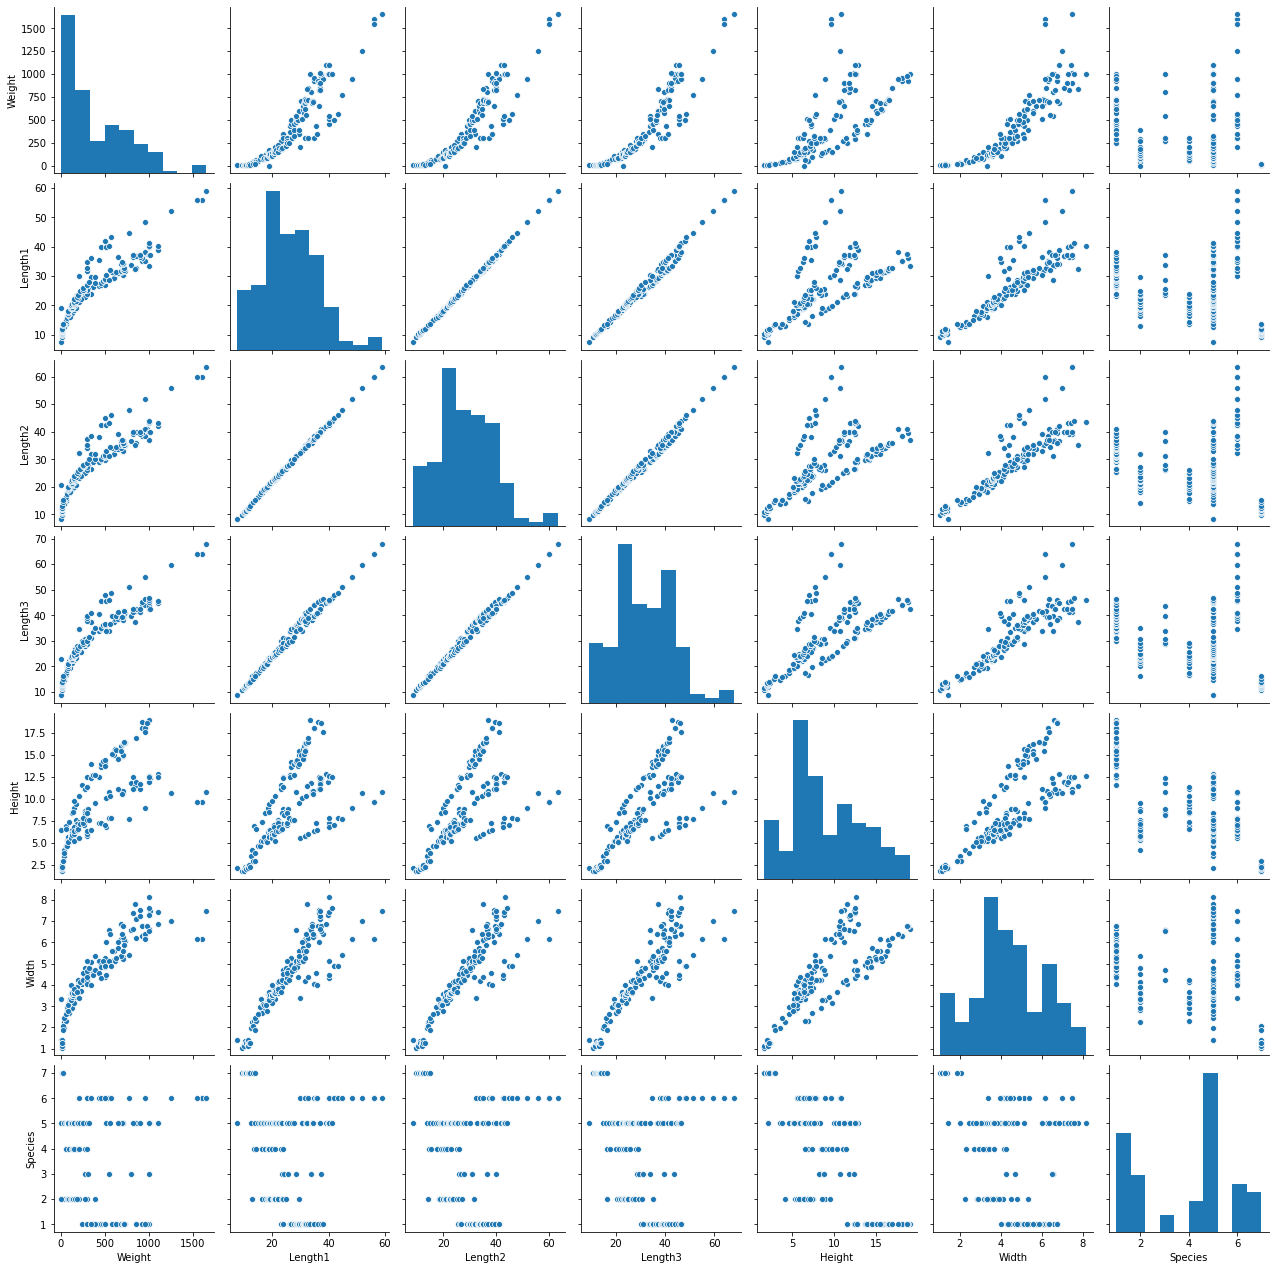

In [11]:
sns.pairplot(newdb)

In [42]:
features=newdb.columns[:-1]
features=['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [12]:
y=newdb[newdb.columns[-1]] #assigns last columm of the dataset

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

In [16]:
x=newdb[newdb.columns[:-1]]

In [17]:
x.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [31]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [47]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names =features,
                class_names=['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

IndexError: list index out of range

In [20]:
model=LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
pred=model.predict(x_test)
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Weight,0.002334
Length1,0.847301
Length2,0.521465
Length3,-1.196760
Height,-0.020132
Width,-0.800228


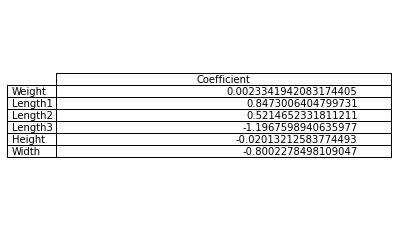

In [27]:
from pandas.plotting import table 
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, coeff_df, loc='center')  # where df is your data frame

plt.savefig('mytable.png',bbox_inches='tight')

In [224]:
y_test.head()

384    12.9
101    32.9
179    42.6
165    30.6
265    38.1
Name: Y house price of unit area, dtype: float64

In [225]:
from sklearn import metrics

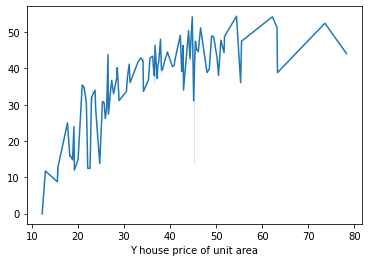

In [226]:
sns.lineplot(y_test,pred)

In [227]:
model.score(x,y)*100

58.008416276593366

In [228]:
import joblib

In [229]:
joblib.dump(model,'general_model.sav')#current model

['general_model.sav']